<a href="https://colab.research.google.com/github/hemantborse/Practical-Application---Car-Pricing/blob/main/Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from collections import Counter

from random import shuffle, seed

import warnings
warnings.filterwarnings('ignore')

In [144]:
#Read CSV in to auto dataset
auto = pd.read_csv('data/vehicles.csv')
auto.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [145]:
# there are lot of NaN in data , remove them
auto.dropna(inplace=True)
nan_check = auto.isna().sum()
print(nan_check)


id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64


In [146]:
auto.isnull().sum()

,0
id,0
region,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0


In [147]:

#some price rows shoing 0 value , lets remove/drop those rows
auto_no_all_zero_rows = auto[auto['price'] != 0]
auto_no_all_zero_rows.head(-100)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426045,7306744835,wausau,4995,2007.0,chevrolet,hhr lt,good,4 cylinders,gas,120772.0,clean,automatic,3GNDA33P47S615928,fwd,mid-size,hatchback,red,wi
426047,7306733327,wausau,15985,2015.0,buick,encore,excellent,4 cylinders,gas,47825.0,clean,automatic,KL4CJHSB7FB268171,4wd,compact,SUV,black,wi
426048,7306732436,wausau,5995,2008.0,chevrolet,impala ltz,good,6 cylinders,gas,119425.0,clean,automatic,2G1WT55N281309545,fwd,full-size,sedan,grey,wi
426049,7306726680,wausau,11895,2016.0,chevrolet,cruze,excellent,4 cylinders,gas,79053.0,clean,automatic,1G1BE5SM3G7276948,fwd,compact,sedan,red,wi


In [148]:
# Check Duplication
auto_no_all_zero_rows.duplicated().sum()

np.int64(0)

In [149]:
#Check datatype
auto_no_all_zero_rows.dtypes


,0
id,int64
region,object
price,int64
year,float64
manufacturer,object
model,object
condition,object
cylinders,object
fuel,object
odometer,float64


In [150]:
#drop id column as it is not relevant
auto_no_all_zero_rows = auto_no_all_zero_rows.drop('id', axis=1)

In [151]:
#Convert cylinders column from obj to int by extracting int value from data/value, this may reveal some interesting facts about data
auto_no_all_zero_rows['cylinders'] = auto_no_all_zero_rows['cylinders'].str.extract('(\\d+)').astype('Int64')
if  auto_no_all_zero_rows['cylinders'].isna().any() :
       auto_no_all_zero_rows.dropna(inplace=True)

In [152]:
#Check statistics of data set, also ensure cylinders apperars in the result.
auto_no_all_zero_rows.describe()

,price,year,cylinders,odometer
count,32404.000000,32404.000000,32404.0,3.240400e+04
mean,16990.721084,2010.944606,6.017683,1.090727e+05
std,13209.776774,7.233817,1.692998,1.023463e+05
min,1.000000,1905.000000,3.0,0.000000e+00
25%,7500.000000,2008.000000,4.0,6.752175e+04
50%,13200.000000,2012.000000,6.0,1.057125e+05
75%,23395.000000,2015.000000,8.0,1.428722e+05
max,155000.000000,2022.000000,12.0,9.999999e+06


In [153]:
#! pip install -U kaleido
#!sudo apt update && sudo apt-get install libnss3 libatk-bridge2.0-0 libcups2 libxcomposite1 libxdamage1 libxfixes3 libxrandr2 libgbm1 libxkbcommon0 libpango-1.0-0 libcairo2 libasound2

In [154]:
#import os
#os.environ["BROWSER_PATH"] = "C:/Program Files/Google/Chrome/Application/chrome.exe"
#Visualizations:
#plotly line plot to observe year on x axis and price on y axis
fig = px.line(auto_no_all_zero_rows, x='year', y='price',color='manufacturer')
fig.show()
# Create the 'images' directory if it doesn't exist
#if not os.path.exists('images'):
#    os.makedirs('images')

#fig.write_image("YoY_Car_Prices")
#fig.write_image('images/YoY_Car_Prices.png')

In [155]:
# Lets analyse data on cylinders = 3

filtered_auto3 = auto_no_all_zero_rows[auto_no_all_zero_rows['cylinders'] == 3]

px.line(filtered_auto3, x='year', y='price',color='manufacturer')



In [156]:
# Lets analyse data on cylinders = 4
filtered_auto4 = auto_no_all_zero_rows[auto_no_all_zero_rows['cylinders'] == 4]

px.line(filtered_auto4, x='year', y='price',color='manufacturer')

In [157]:
# Lets analyse data on cylinders = 6
filtered_auto6 = auto_no_all_zero_rows[auto_no_all_zero_rows['cylinders'] == 6]

px.line(filtered_auto6, x='year', y='price',color='manufacturer')

In [158]:
# Lets analyse data on cylinders = 8
filtered_auto8 = auto_no_all_zero_rows[auto_no_all_zero_rows['cylinders'] == 8]

px.line(filtered_auto8, x='year', y='price',color='manufacturer')

In [159]:
# Lets analyse data on cylinders = 3
filtered_auto12 = auto_no_all_zero_rows[auto_no_all_zero_rows['cylinders'] == 12]

px.line(filtered_auto12, x='year', y='price',color='manufacturer')

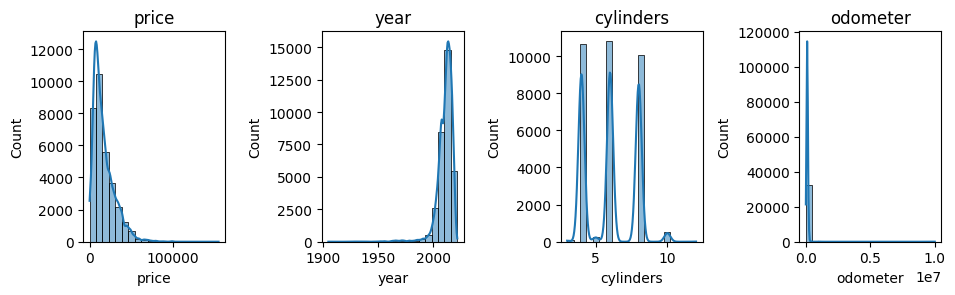

<Figure size 640x480 with 0 Axes>

In [160]:
# Distribution of Numerical Features
numerical_features = ['price','year','cylinders',	'odometer']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=auto_no_all_zero_rows[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()
plt.savefig('images/Distribution_of_Numerical_Features.png')

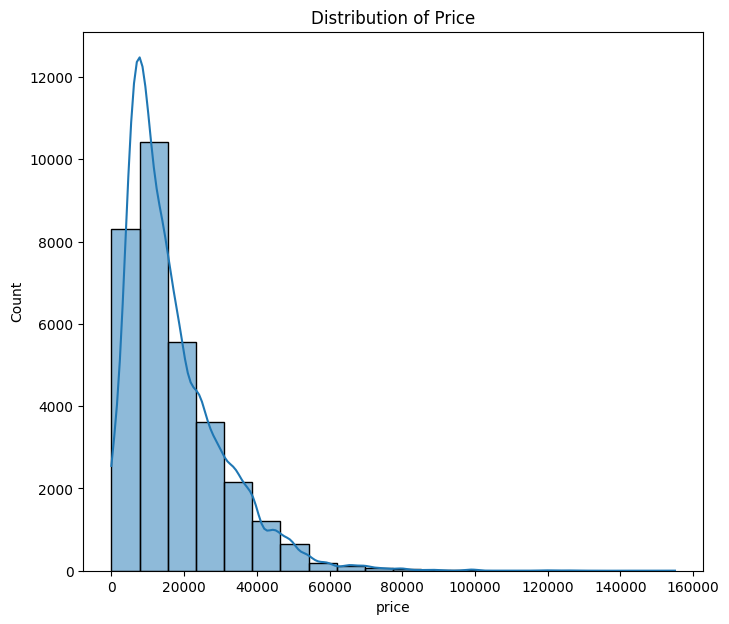

<Figure size 640x480 with 0 Axes>

In [161]:
# Price distribution analysis
plt.figure(figsize=(8, 7))
sns.histplot(data=auto_no_all_zero_rows['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()
plt.savefig('images/Price_Analysis.png')

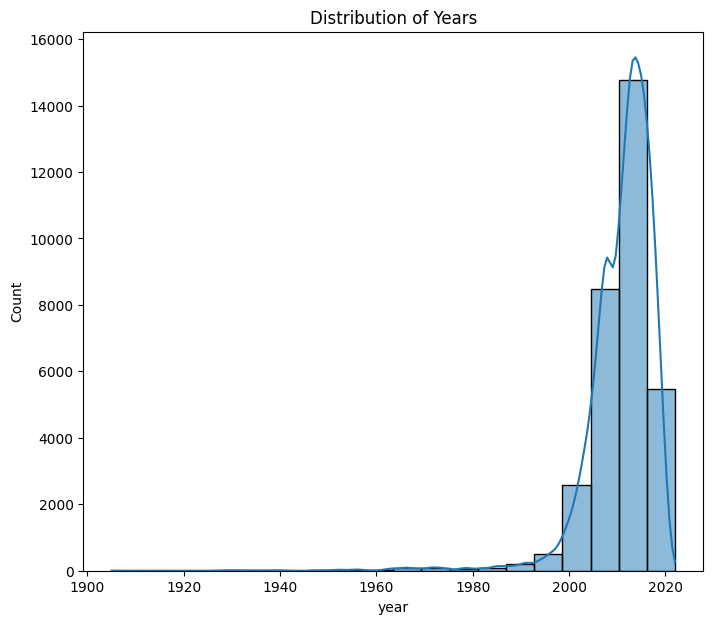

<Figure size 640x480 with 0 Axes>

In [162]:
# Year distribution analysis
plt.figure(figsize=(8, 7))
sns.histplot(data=auto_no_all_zero_rows['year'], bins=20, kde=True)
plt.title('Distribution of Years')
plt.show()
plt.savefig('images/Year_Analysis.png')

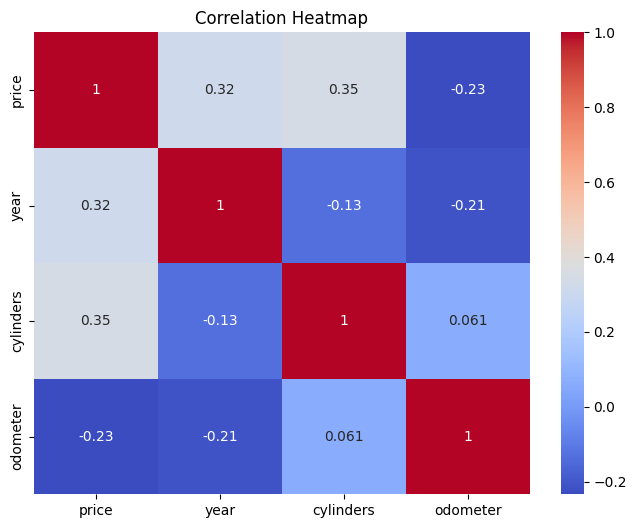

<Figure size 640x480 with 0 Axes>

In [163]:
# Correlation analysis of above numarical features
correlation_matrix = auto_no_all_zero_rows[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('images/Correlation_Analysis.png')

**Observations on visual plots** :

*   larger number of the cars are from 2015 to 2020 there are some outliers for example with ford where some prices are out of range.
*   3 and 12 capacity cylender cars are least in number in dataset where as more data available for 4,6 and 8 cylender capacity cars.
*   Most number of the cars are in 10K to 15K range
*   Most number of the cars are fron year 2010 to 2015
*   Correlation Heatmap shows Odometer has negative correlation with price , means odometer goes higher price is lower hence it is an important factor to consider in this assignment
*   Postive corelation between year and price also shows as year increase(newer car) ,price goes up -another important factor to consider while training the model.
*   Postive correlation in cylinders and price shows higher the cylinders value higher is the price.







In [164]:
#Liner Regression Year and Price only
X=auto_no_all_zero_rows[['year']]
y=auto_no_all_zero_rows['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 153178416.23067233


In [165]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':np.round(y_pred),'Difference':np.round(y_test-y_pred)})
pred_df

,Actual Value,Predicted Value,Difference
269691,26950,20545.0,6405.0
254116,6995,19971.0,-12976.0
375947,4995,13648.0,-8653.0
354878,20789,19971.0,818.0
229924,8500,4452.0,4048.0
...,...,...,...
308428,12997,18246.0,-5249.0
232773,12950,17097.0,-4147.0
119575,7900,15947.0,-8047.0
423881,35990,18821.0,17169.0


In [166]:
#Liner Regression year,odometer and price
X=auto_no_all_zero_rows[['year','odometer']]
y=auto_no_all_zero_rows['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 154834221.20315465


In [167]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':np.round(y_pred),'Difference':np.round(y_test-y_pred)})
pred_df

,Actual Value,Predicted Value,Difference
269691,26950,21352.0,5598.0
254116,6995,20663.0,-13668.0
375947,4995,13674.0,-8679.0
354878,20789,19676.0,1113.0
229924,8500,5181.0,3319.0
...,...,...,...
308428,12997,17489.0,-4492.0
232773,12950,16430.0,-3480.0
119575,7900,15701.0,-7801.0
423881,35990,20455.0,15535.0


In [168]:
#Liner Regression year,odometer,cylinders and price
X=auto_no_all_zero_rows[['year','odometer','cylinders']]
y=auto_no_all_zero_rows['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 128612716.23063196


In [169]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':np.round(y_pred),'Difference':np.round(y_test-y_pred)})
pred_df

,Actual Value,Predicted Value,Difference
269691,26950,28237.0,-1287.0
254116,6995,14815.0,-7820.0
375947,4995,6715.0,-1720.0
354878,20789,20068.0,721.0
229924,8500,9357.0,-857.0
...,...,...,...
308428,12997,17557.0,-4560.0
232773,12950,16312.0,-3362.0
119575,7900,15421.0,-7521.0
423881,35990,33427.0,2563.0


In [170]:
#Liner Regression year,odometer,cylinders and price
X=auto_no_all_zero_rows[['year','cylinders']]
y=auto_no_all_zero_rows['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 127007492.15459596


In [171]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':np.round(y_pred),'Difference':np.round(y_test-y_pred)})
pred_df

,Actual Value,Predicted Value,Difference
269691,26950,27247.0,-297.0
254116,6995,14178.0,-7183.0
375947,4995,6813.0,-1818.0
354878,20789,20378.0,411.0
229924,8500,8499.0,1.0
...,...,...,...
308428,12997,18369.0,-5372.0
232773,12950,17030.0,-4080.0
119575,7900,15691.0,-7791.0
423881,35990,31437.0,4553.0


**Observations Liner Regression** :


*   LinerRegression on different features shows different results
*   hacing only year and price combination OR year,odometer and price shows similar MSE results
*   Once we consider cylinders feature with year,odometer and price , it brings MSE downto smaller value when add with year and odometer
*   least MSE is seen when year and cylender considered and price and prediction Vs Actual Sales Value are very close, hece this seems to be the best model , atleast for now.

*   We however need to be careful how effective the least MSE cobination would be in real world data , we must choose a model which can predict most accurately in real world scenarios.







In [172]:
#if we consider year 200 onwards we can see plotly liner Regression as below

filtered_df = auto_no_all_zero_rows[auto_no_all_zero_rows['year'] > 2000.0]

fig = px.scatter(filtered_df, x='year', y='price',trendline='ols',trendline_color_override='black')
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].params
fig.show()

In [173]:
from sklearn.pipeline import Pipeline

pipelined_model = Pipeline([

    ('auto_transform', PolynomialFeatures(degree = 3,include_bias=False)),

    ('auto_regression', LinearRegression())

])

pipelined_model.fit(auto_no_all_zero_rows[['year','odometer','cylinders']], auto_no_all_zero_rows['price'])

Pipeline(steps=[('auto_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('auto_regression', LinearRegression())])

In [174]:
#Sequential Feature Selection : Cross-Validation with SequentialFeatureSelector
#To begin, create a list of the indices of the DataFrame auto_no_all_zero_rows. Assign this list to all_indices. Then, use the shuffle function to shuffle the list in place.
all_indices = list(range(0, len(auto_no_all_zero_rows)))
seed(42)
shuffle(all_indices)
#Use the np.split function to split the all_indices data based on the first 350 values. Assign these as arrays to train_idx and test_idx below.
train_idx, test_idx = np.split(all_indices, [350])
X=auto_no_all_zero_rows[['year','odometer','cylinders']]
y=auto_no_all_zero_rows['price']
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=2,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)

lr = LinearRegression().fit(Xt, y)
model_preds = lr.predict(Xt)
mse = mean_squared_error(y, model_preds)
print("MSE : ", mse)



MSE :  130123198.26409261


In [175]:
#Comparing Complexity and Variance
X = auto_no_all_zero_rows.loc[:,['year']]
y = auto_no_all_zero_rows['price']
sample = auto_no_all_zero_rows.sample(10, random_state = 22)
X_train = sample.loc[:, ['year']]
y_train = sample['price']
X_train

,year
108859,2004.0
359697,2018.0
60731,2014.0
241903,2007.0
236068,2012.0
388557,2012.0
386742,1994.0
304493,2005.0
172825,2012.0
98601,2008.0


In [176]:
y

,price
215,4000
219,2500
268,9000
337,8950
338,4000
...,...
426785,23495
426788,12995
426792,32999
426793,15999


In [177]:
y_train

,price
108859,11995
359697,32375
60731,27546
241903,14995
236068,38900
388557,13995
386742,7000
304493,8750
172825,13375
98601,5998


In [178]:
X.shape

(32404, 1)

In [179]:
#Iterate on Models

model_predictions = {f'degree_{i}': None for i in range(1, 11)}

print("Starting Dictionary of Predictions\n", model_predictions)

for i in range(1, 11):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = False)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_train)
    model_predictions[f'degree_{i}'] = preds
# Answer check
model_predictions['degree_1'][:10]

Starting Dictionary of Predictions
 {'degree_1': None, 'degree_2': None, 'degree_3': None, 'degree_4': None, 'degree_5': None, 'degree_6': None, 'degree_7': None, 'degree_8': None, 'degree_9': None, 'degree_10': None}


array([12212.4612326 , 28283.36182903, 23691.67594433, 15656.22564612,
       21395.83300199, 21395.83300199,   733.24652088, 13360.38270378,
       21395.83300199, 16804.1471173 ])

In [180]:
#DataFrame of Predictions
pred_df = pd.DataFrame(model_predictions)
print(pred_df.head())

       degree_1      degree_2      degree_3      degree_4      degree_5  \
0  12212.461233   9397.706738   8439.146790   8437.236305   8435.378813   
1  28283.361829  34623.232888  33496.793694  33492.746338  33488.633160   
2  23691.675944  24840.021010  25371.057148  25373.958290  25376.837152   
3  15656.225646  12678.043706  12485.655384  12484.025017  12482.390409   
4  21395.833002  20721.190678  21379.638866  21381.833717  21383.999598   

       degree_6      degree_7      degree_8      degree_9     degree_10  
0   8433.521717   8431.682734   8429.861706   8428.058629   8426.273443  
1  33484.561819  33480.496024  33476.436003  33472.381841  33468.333560  
2  25379.754773  25382.690465  25385.644299  25388.616255  25391.606272  
3  12480.732745  12479.058499  12477.367710  12475.660508  12473.936951  
4  21386.174460  21388.345400  21390.512421  21392.675499  21394.834547  


In [181]:
#Dataframe of Errors
#Predicted Vs actual price
error_df = pred_df.subtract(y_train.reset_index(drop=True), axis = 0)
print(error_df.head())

       degree_1      degree_2      degree_3      degree_4      degree_5  \
0    217.461233  -2597.293262  -3555.853210  -3557.763695  -3559.621187   
1  -4091.638171   2248.232888   1121.793694   1117.746338   1113.633160   
2  -3854.324056  -2705.978990  -2174.942852  -2172.041710  -2169.162848   
3    661.225646  -2316.956294  -2509.344616  -2510.974983  -2512.609591   
4 -17504.166998 -18178.809322 -17520.361134 -17518.166283 -17516.000402   

       degree_6      degree_7      degree_8      degree_9     degree_10  
0  -3561.478283  -3563.317266  -3565.138294  -3566.941371  -3568.726557  
1   1109.561819   1105.496024   1101.436003   1097.381841   1093.333560  
2  -2166.245227  -2163.309535  -2160.355701  -2157.383745  -2154.393728  
3  -2514.267255  -2515.941501  -2517.632290  -2519.339492  -2521.063049  
4 -17513.825540 -17511.654600 -17509.487579 -17507.324501 -17505.165453  


In [182]:
#Mean and Variance of Model Errors
#Using the DataFrame of errors, examine the mean and variance of each model's error.
#This will help to check what degree model has the highest variance


variance_errors = error_df.var()
highest_var_degree = int(variance_errors.idxmax().split('_')[1])
print(f"\nThe degree with the highest variance in errors is degree {highest_var_degree}.")
print(highest_var_degree)


The degree with the highest variance in errors is degree 1.
1


**Observation**
Low-degree polynomials (e.g., degree in this case 1): A low-degree polynomial, is a simple model with low variance. Because it is not very flexible, it produces a very similar fit even with slightly different training data. However, **if the true relationship is not linear, this model will have high bias, resulting in large, systematic errors.**

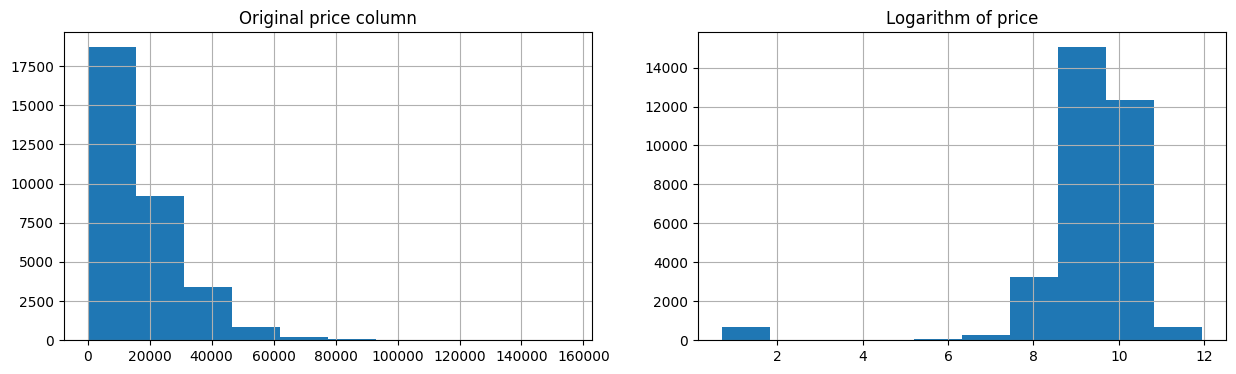

In [183]:
#build regression models to predict the logarithm of the price column.
#The dataset auto_no_all_zero_rows is loaded and displayed below, and the original target is plotted next to its resulting logarithm.
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(auto_no_all_zero_rows['price'])
ax[0].grid()
ax[0].set_title('Original price column')
ax[1].hist(np.log1p(auto_no_all_zero_rows['price']))
ax[1].grid()
ax[1].set_title('Logarithm of price');

In [184]:
#Polynomialfeatures

X_train, X_test, y_train, y_test = train_test_split(auto_no_all_zero_rows[['year','odometer','cylinders']], np.log1p(auto_no_all_zero_rows.price),
                                                   random_state=42, test_size = 0.3)

poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train[['year','odometer','cylinders']])
X_test_poly = poly_features.transform(X_test[['year','odometer','cylinders']])
columns = poly_features.get_feature_names_out()
train_df = pd.DataFrame(X_train_poly, columns=columns)
test_df = pd.DataFrame(X_test_poly, columns = columns)
test_df.to_csv('data/test_auto_cubic.csv', index = False)
train_df.to_csv('data/train_auto_cubic.csv', index = False)
train_df.head()

,year,odometer,cylinders,year^2,year odometer,year cylinders,odometer^2,odometer cylinders,cylinders^2,year^3,year^2 odometer,year^2 cylinders,year odometer^2,year odometer cylinders,year cylinders^2,odometer^3,odometer^2 cylinders,odometer cylinders^2,cylinders^3
0,2005.0,235406.0,8.0,4020025.0,471989030.0,16040.0,5.541598e+10,1883248.0,64.0,8.060150e+09,9.463380e+11,32160200.0,1.111090e+14,3.775912e+09,128320.0,1.304526e+16,4.433279e+11,15065984.0,512.0
1,2014.0,107865.0,4.0,4056196.0,217240110.0,8056.0,1.163486e+10,431460.0,16.0,8.169179e+09,4.375216e+11,16224784.0,2.343260e+13,8.689604e+08,32224.0,1.254994e+15,4.653943e+10,1725840.0,64.0
2,2017.0,68655.0,10.0,4068289.0,138477135.0,20170.0,4.713509e+09,686550.0,100.0,8.205739e+09,2.793084e+11,40682890.0,9.507148e+12,1.384771e+09,201700.0,3.236060e+14,4.713509e+10,6865500.0,1000.0
3,2018.0,104000.0,6.0,4072324.0,209872000.0,12108.0,1.081600e+10,624000.0,36.0,8.217950e+09,4.235217e+11,24433944.0,2.182669e+13,1.259232e+09,72648.0,1.124864e+15,6.489600e+10,3744000.0,216.0
4,2013.0,98765.0,4.0,4052169.0,198813945.0,8052.0,9.754525e+09,395060.0,16.0,8.157016e+09,4.002125e+11,16208676.0,1.963586e+13,7.952558e+08,32208.0,9.634057e+14,3.901810e+10,1580240.0,64.0


In [185]:
#Sequential Feature Selection
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=3)
best_features = selector.fit_transform(train_df, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())
best_features_df.head()

,cylinders,year^2,year^3
0,8.0,4020025.0,8.060150e+09
1,4.0,4056196.0,8.169179e+09
2,10.0,4068289.0,8.205739e+09
3,6.0,4072324.0,8.217950e+09
4,4.0,4052169.0,8.157016e+09


In [186]:
pipe = Pipeline([('column_selector', selector),
                ('linreg', LinearRegression())])
pipe.fit(train_df, y_train)
train_preds = pipe.predict(train_df)
test_preds = pipe.predict(test_df)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)


# Answer check
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe

Train MSE:  2.12
Test MSE:  2.19


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('linreg', LinearRegression())])

In [187]:
#Backward Selction
#Repeat above forward selection but with backword selector this time

backward_selector = SequentialFeatureSelector(LinearRegression(),
                                              n_features_to_select=3,
                                              direction = 'backward')
backward_pipe = Pipeline([('column_selector', backward_selector),
                ('linreg', LinearRegression())])
backward_pipe.fit(train_df, y_train)
train_preds = backward_pipe.predict(train_df)
test_preds = backward_pipe.predict(test_df)
backward_train_mse = mean_squared_error(y_train, train_preds)
backward_test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {backward_train_mse: .2f}')
print(f'Test MSE: {backward_test_mse: .2f}')
backward_pipe

Train MSE:  2.21
Test MSE:  2.30


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('linreg', LinearRegression())])

In [191]:
#Ridge Regression Model

X=auto_no_all_zero_rows[['year','odometer','cylinders']]
y=auto_no_all_zero_rows['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#default ridge model

model_1 = Ridge().fit(X_train, y_train)
model_1_coefs = model_1.coef_
print(f'Ridge Coefs: {np.round(model_1_coefs, 2)}')


Ridge Coefs: [ 5.85750e+02 -3.00000e-02  3.15699e+03]


In [192]:
#Explore different alpha values
alphas = [0.001, 1.0, 10.0, 100.0]
coef_list = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    coef_list.append(list(ridge.coef_))
len(coef_list)
print('For alpha = 100 we have the following coefficients:')
list(zip(X_train.columns, coef_list[-1]))

For alpha = 100 we have the following coefficients:


[('year', np.float64(585.5781720536646)),
 ('odometer', np.float64(-0.03027642386135406)),
 ('cylinders', np.float64(3152.7006610685526))]

In [197]:
cylinders_coefs = list([i[2] for i in coef_list])
print(cylinders_coefs)
print('as we increase alpha the value of the coefficient for cylinders decreases')

[np.float64(3157.0370253037054), np.float64(3156.9936458496313), np.float64(3156.602893473003), np.float64(3152.7006610685526)]
as we increase alpha the value of the coefficient for cylinders decreases


In [203]:
#Using StandardScaler

X=auto_no_all_zero_rows[['year','odometer','cylinders']]
y=auto_no_all_zero_rows['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train_scaled = (X_train - np.mean(X_train))/np.std(X_train)
print(X_train_scaled.mean())
print('-----------------')
print(X_train_scaled.std())
print('-----------------------------------------------')
X_test_scaled = (X_test - np.mean(X_train))/np.std(X_train)
print(X_test_scaled.mean())
print('-----------------')
print(X_test_scaled.std())
print('-----------------------------------------------')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(scaler.mean_)
print('----------')
print(scaler.scale_)


year         -4805.311277
odometer         0.783009
cylinders   -21801.682418
dtype: Float64
-----------------
year         1.000019
odometer     1.000019
cylinders    1.000019
dtype: Float64
-----------------------------------------------
year         -4805.311197
odometer         0.794912
cylinders   -21801.698987
dtype: Float64
-----------------
year         0.973191
odometer     1.487249
cylinders    0.994357
dtype: Float64
-----------------------------------------------
[2.01094449e+03 1.08854098e+05 6.02329977e+00]
----------
[7.27238577e+00 9.18215419e+04 1.69486913e+00]


In [204]:
scaled_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]).fit(X_train, y_train)
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 123574745.17427519
Test MSE: 128612164.52441351
